In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import urllib.request

def apply_convolution(image, kernel):
    return cv2.filter2D(image, -1, kernel)

def blur(image, strength=1):
    blurred_image = image.copy()
    for _ in range(strength):
        blurred_channels = [apply_convolution(channel, np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16.0) for channel in cv2.split(blurred_image)]
        blurred_image = cv2.merge(blurred_channels)
    return blurred_image


def sharpen(image):
    sharpened_channels = [apply_convolution(channel, np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])) for channel in cv2.split(image)]
    return cv2.merge(sharpened_channels)



image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Wolverine_on_rock.jpg/1280px-Wolverine_on_rock.jpg"
image_array = np.asarray(bytearray(urllib.request.urlopen(image_url).read()), dtype=np.uint8)
original_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Dodajemy kilka powtórzeń blurowania, aby zwiększyć efekt
blurred_image = blur(original_image, strength=7)
sharpened_image = sharpen(original_image)



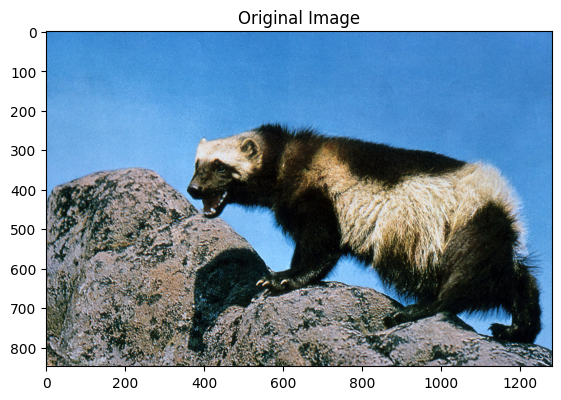

In [39]:
plt.figure(figsize=(30, 15))
plt.subplot(2, 4, 1)
plt.imshow(original_image[:, :, ::-1])
plt.title('Original Image')
plt.show()

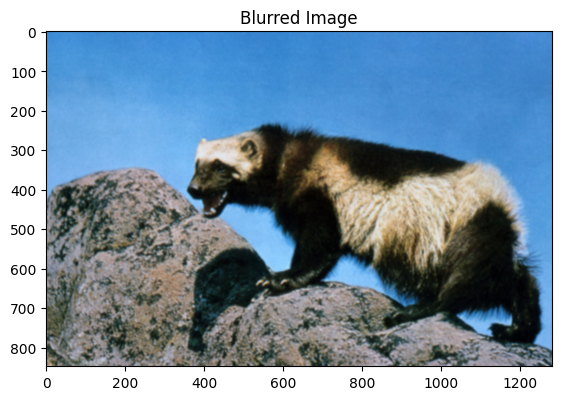

In [40]:
plt.figure(figsize=(30, 15))
plt.subplot(2, 4, 2)
plt.imshow(blurred_image[:, :, ::-1])
plt.title('Blurred Image')
plt.show()

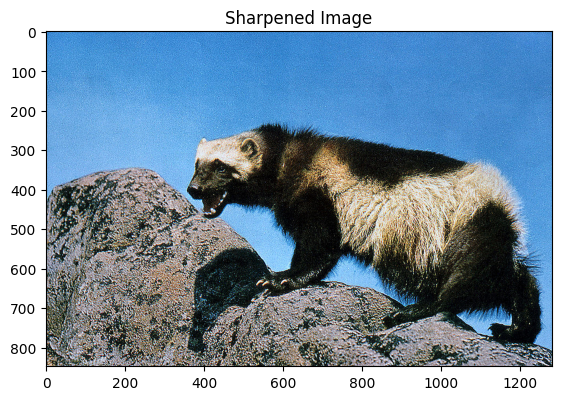

In [41]:
plt.figure(figsize=(30, 15))
plt.subplot(2, 4, 3)
plt.imshow(sharpened_image[:, :, ::-1])
plt.title('Sharpened Image')
plt.show()